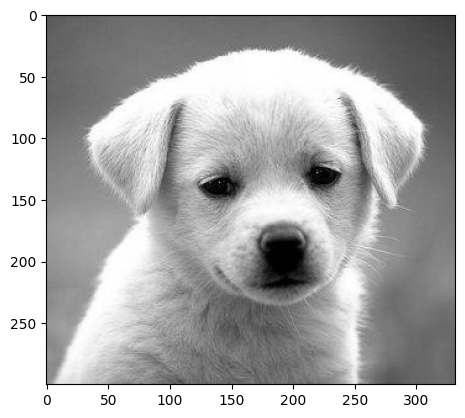

In [5]:
# Compressed-image-using-Principle-Component-Analysis
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open("C:/Users/start/Desktop/5226523_orig.jpg")
plt.imshow(img)
plt.show()
image_array = np.array(img)



In [2]:
img_meaned = image_array - np.mean(image_array, axis=0)
print(img_meaned)

print(image_array.shape)
print(img_meaned.shape)

[[[-38.72333333 -38.72333333 -38.72333333]
  [-39.73333333 -39.73333333 -39.73333333]
  [-39.89666667 -39.89666667 -39.89666667]
  ...
  [-42.53666667 -42.53666667 -42.53666667]
  [-42.28666667 -42.28666667 -42.28666667]
  [-42.97666667 -42.97666667 -42.97666667]]

 [[-38.72333333 -38.72333333 -38.72333333]
  [-38.73333333 -38.73333333 -38.73333333]
  [-39.89666667 -39.89666667 -39.89666667]
  ...
  [-42.53666667 -42.53666667 -42.53666667]
  [-42.28666667 -42.28666667 -42.28666667]
  [-42.97666667 -42.97666667 -42.97666667]]

 [[-37.72333333 -37.72333333 -37.72333333]
  [-38.73333333 -38.73333333 -38.73333333]
  [-38.89666667 -38.89666667 -38.89666667]
  ...
  [-42.53666667 -42.53666667 -42.53666667]
  [-42.28666667 -42.28666667 -42.28666667]
  [-41.97666667 -41.97666667 -41.97666667]]

 ...

 [[ 16.27666667  16.27666667  16.27666667]
  [ 16.26666667  16.26666667  16.26666667]
  [ 17.10333333  17.10333333  17.10333333]
  ...
  [ -0.53666667  -0.53666667  -0.53666667]
  [ -0.28666667  -

In [3]:
# Reshape the img_meaned to make it 2D
img_meaned_2d = img_meaned.reshape(image_array.shape[0], -1)

print(img_meaned_2d.shape)

cov_mat = np.cov(img_meaned_2d, rowvar=False)
print(cov_mat.shape)
print(cov_mat)

eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

print(eigen_vectors.shape)
print(eigen_values)

(300, 996)
(996, 996)
[[449.89309922 449.89309922 449.89309922 ... 402.43499443 402.43499443
  402.43499443]
 [449.89309922 449.89309922 449.89309922 ... 402.43499443 402.43499443
  402.43499443]
 [449.89309922 449.89309922 449.89309922 ... 402.43499443 402.43499443
  402.43499443]
 ...
 [402.43499443 402.43499443 402.43499443 ... 464.59142698 464.59142698
  464.59142698]
 [402.43499443 402.43499443 402.43499443 ... 464.59142698 464.59142698
  464.59142698]
 [402.43499443 402.43499443 402.43499443 ... 464.59142698 464.59142698
  464.59142698]]
(996, 996)
[-2.20858331e-10 -9.31268983e-11 -4.93506056e-11 -3.93614529e-11
 -3.35115913e-11 -3.12215549e-11 -2.60708225e-11 -2.43482836e-11
 -2.20307920e-11 -1.98777744e-11 -1.97488070e-11 -1.94734790e-11
 -1.86360041e-11 -1.73384521e-11 -1.68384468e-11 -1.64928714e-11
 -1.61762686e-11 -1.59142598e-11 -1.55002903e-11 -1.52187223e-11
 -1.49227683e-11 -1.47353940e-11 -1.43355739e-11 -1.43143762e-11
 -1.39636139e-11 -1.39018248e-11 -1.37243916e-11 

In [4]:
# Sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
print(sorted_index)
sorted_eigenvalues = eigen_values[sorted_index]

[995 994 993 992 991 990 989 988 987 986 985 984 983 982 981 980 979 978
 977 976 975 974 973 972 971 970 969 968 967 966 965 964 963 962 961 960
 959 958 957 956 955 954 953 952 951 950 949 948 947 946 945 944 943 942
 941 940 939 938 937 936 935 934 933 932 931 930 929 928 927 926 925 924
 923 922 921 920 919 918 917 916 915 914 913 912 911 910 909 908 907 906
 905 904 903 902 901 900 899 898 897 896 895 894 893 892 891 890 889 888
 887 886 885 884 883 882 881 880 879 878 877 876 875 874 873 872 871 870
 869 868 867 866 865 864 863 862 861 860 859 858 857 856 855 854 853 852
 851 850 849 848 847 846 845 844 843 842 841 840 839 838 837 836 835 834
 833 832 831 830 829 828 827 826 825 824 823 822 821 820 819 818 817 816
 815 814 813 812 811 810 809 808 807 806 805 804 803 802 801 800 799 798
 797 796 795 794 793 792 791 790 789 788 787 786 785 784 783 782 781 780
 779 778 777 776 775 774 773 772 771 770 769 768 767 766 765 764 763 762
 761 760 759 758 757 756 755 754 753 752 751 750 74

In [6]:
# Similarly sort the eigenvectors
sorted_eigenvectors = eigen_vectors[:, sorted_index]

n_components = 2  # You can select any number of components.
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]

print(eigenvector_subset)

X_reduced = np.dot(eigenvector_subset.transpose(), img_meaned_2d.transpose()).transpose()
print(X_reduced)
compression_ratio = 0.5
n_components = int(compression_ratio * len(sorted_eigenvalues))

selected_eigenvectors = sorted_eigenvectors[:, :n_components]

X_reduced = np.dot(img_meaned_2d, selected_eigenvectors)

reconstructed_array = np.dot(X_reduced, selected_eigenvectors.T) + np.mean(image_array, axis=0)

reconstructed_image = reconstructed_array.reshape(image_array.shape)

compressed_image = Image.fromarray(reconstructed_image.astype(np.uint8))

compressed_image.save("compressed_image.jpg")
compressed_image.show()

[[0.01071267 0.01119935]
 [0.01071267 0.01119935]
 [0.01071267 0.01119935]
 ...
 [0.00817419 0.01602083]
 [0.00817419 0.01602083]
 [0.00817419 0.01602083]]
[[ 8.87534479e+02 -1.51759919e+03]
 [ 8.85881979e+02 -1.51248213e+03]
 [ 8.82461063e+02 -1.49981629e+03]
 [ 8.74113408e+02 -1.48617232e+03]
 [ 8.66594020e+02 -1.47923606e+03]
 [ 8.49558204e+02 -1.46805015e+03]
 [ 8.35805589e+02 -1.45754053e+03]
 [ 8.28308679e+02 -1.45302369e+03]
 [ 8.13860884e+02 -1.43846063e+03]
 [ 8.11146625e+02 -1.43291054e+03]
 [ 8.05707437e+02 -1.42365958e+03]
 [ 7.95940339e+02 -1.41552006e+03]
 [ 7.89627642e+02 -1.41068624e+03]
 [ 7.77142190e+02 -1.40232004e+03]
 [ 7.66736136e+02 -1.39211301e+03]
 [ 7.61657050e+02 -1.38604776e+03]
 [ 7.57723714e+02 -1.38010806e+03]
 [ 7.49747062e+02 -1.37566016e+03]
 [ 7.36583402e+02 -1.37189624e+03]
 [ 7.27782557e+02 -1.36075327e+03]
 [ 7.29067608e+02 -1.35647771e+03]
 [ 7.24815597e+02 -1.34117497e+03]
 [ 7.08681225e+02 -1.33579690e+03]
 [ 6.92732932e+02 -1.33383084e+03]
 [ 6

ValueError: operands could not be broadcast together with shapes (300,996) (332,3) 